# Building an Image Classifier using the Sequential API

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[5000:], y_train_full[5000:]

In [4]:
X_train.shape

(5000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [7]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
             metrics=['accuracy'])

In [16]:
history=model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
157/157 [==============================] - 7s 36ms/step - loss: 0.7694 - accuracy: 0.7330 - val_loss: 0.6227 - val_accuracy: 0.7735
Epoch 2/30
157/157 [==============================] - 5s 32ms/step - loss: 0.5168 - accuracy: 0.8192 - val_loss: 0.5552 - val_accuracy: 0.8050
Epoch 3/30
157/157 [==============================] - 5s 31ms/step - loss: 0.4361 - accuracy: 0.8412 - val_loss: 0.4809 - val_accuracy: 0.8315
Epoch 4/30
157/157 [==============================] - 5s 33ms/step - loss: 0.3964 - accuracy: 0.8580 - val_loss: 0.5615 - val_accuracy: 0.8063
Epoch 5/30
157/157 [==============================] - 5s 31ms/step - loss: 0.3531 - accuracy: 0.8754 - val_loss: 0.4773 - val_accuracy: 0.8352
Epoch 6/30
157/157 [==============================] - 5s 32ms/step - loss: 0.3256 - accuracy: 0.8826 - val_loss: 0.5093 - val_accuracy: 0.8224
Epoch 7/30
157/157 [==============================] - 5s 32ms/step - loss: 0.3107 - accuracy: 0.8884 - val_loss: 0.4469 - val_accuracy: 0.8477

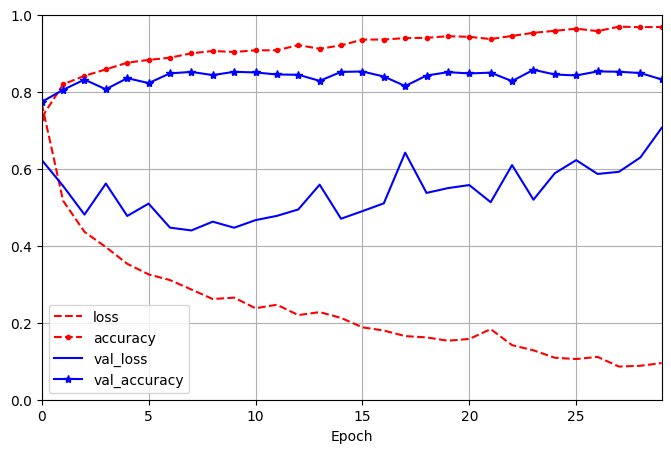

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch', style=["r--","r--.","b-","b-*"]
)
plt.show()

In [23]:
model.predict(X_test[:3]).round(2)

1/1 [==============================] - 0s 71ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

## Build wide and deep network

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california_housing = fetch_california_housing(as_frame=True)

california_df = california_housing.frame

In [40]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer_1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer_2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer_1(normalized)
hidden2 = hidden_layer_2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
